In [89]:
import numpy as np
import pandas as pd

In [90]:
df1=pd.read_excel("India.xlsx")
df2=pd.read_excel("Us.xlsx")

In [91]:
df1=df1.dropna()
df1.reset_index(inplace=True)
df1=df1.drop(['index'],axis=1)
df1.head()

,Date,No of cases,No of deaths
0,2020-05-04,"42,836(+6.4%)","1,389(+6.4%)"
1,2020-05-05,"46,711(+9%)","1,583(+14%)"
2,2020-05-06,"49,391(+5.7%)","1,694(+7%)"
3,2020-05-07,"52,952(+7.2%)","1,783(+5.3%)"
4,2020-05-08,"56,342(+6.4%)","1,886(+5.8%)"


In [92]:
df2=df2.dropna()
df2.reset_index(inplace=True)
df2=df2.drop(['index'],axis=1)
df2.head()

,Date,No of cases,No of deaths
0,2020-05-03,"1,151,643(+2.3%)","61,716(+1.8%)"
1,2020-05-04,"1,172,921(+1.8%)","62,593(+1.4%)"
2,2020-05-05,"1,195,173(+1.9%)","65,028(+3.9%)"
3,2020-05-06,"1,220,032(+2.1%)","67,729(+4.2%)"
4,2020-05-07,"1,247,567(+2.2%)","69,700(+2.9%)"


In [93]:
df1['No of cases']=df1['No of cases'].str.split('(').str[0]
df1['No of deaths']=df1['No of deaths'].str.split('(').str[0]
df1.head()

,Date,No of cases,No of deaths
0,2020-05-04,"42,836","1,389"
1,2020-05-05,"46,711","1,583"
2,2020-05-06,"49,391","1,694"
3,2020-05-07,"52,952","1,783"
4,2020-05-08,"56,342","1,886"


In [94]:
df2['No of cases']=df2['No of cases'].str.split('(').str[0]
df2['No of deaths']=df2['No of deaths'].str.split('(').str[0]
df2.head()

,Date,No of cases,No of deaths
0,2020-05-03,"1,151,643","61,716"
1,2020-05-04,"1,172,921","62,593"
2,2020-05-05,"1,195,173","65,028"
3,2020-05-06,"1,220,032","67,729"
4,2020-05-07,"1,247,567","69,700"


In [95]:
df1["No of cases"] = df1["No of cases"].str.replace(",","").astype(int)
df1["No of deaths"] = df1["No of deaths"].str.replace(",","").astype(int)
df1.head()

,Date,No of cases,No of deaths
0,2020-05-04,42836,1389
1,2020-05-05,46711,1583
2,2020-05-06,49391,1694
3,2020-05-07,52952,1783
4,2020-05-08,56342,1886


In [99]:
df1=df1.rename(columns={"No of cases": "India_cases", "No of deaths": "India_deaths"})
df1.head()

,Date,India_cases,India_deaths
0,2020-05-04,42836,1389
1,2020-05-05,46711,1583
2,2020-05-06,49391,1694
3,2020-05-07,52952,1783
4,2020-05-08,56342,1886


In [97]:
df2["No of cases"] = df2["No of cases"].str.replace(",","").astype(int)
df2["No of deaths"] = df2["No of deaths"].str.replace(",","").astype(int)
df2.head()

,Date,No of cases,No of deaths
0,2020-05-03,1151643,61716
1,2020-05-04,1172921,62593
2,2020-05-05,1195173,65028
3,2020-05-06,1220032,67729
4,2020-05-07,1247567,69700


In [100]:
df2=df2.rename(columns={"No of cases": "Us_cases", "No of deaths": "Us_deaths"})
df2.head()

,Date,Us_cases,Us_deaths
0,2020-05-03,1151643,61716
1,2020-05-04,1172921,62593
2,2020-05-05,1195173,65028
3,2020-05-06,1220032,67729
4,2020-05-07,1247567,69700


In [103]:
merged=pd.merge(df1,df2,on='Date')
print(merged.head())
merged.shape

        Date  India_cases  India_deaths  Us_cases  Us_deaths
0 2020-05-04        42836          1389   1172921      62593
1 2020-05-05        46711          1583   1195173      65028
2 2020-05-06        49391          1694   1220032      67729
3 2020-05-07        52952          1783   1247567      69700
4 2020-05-08        56342          1886   1274681      71395


(14, 5)

In [108]:
merged['India_death_rate']=merged['India_deaths']/merged['India_cases']*100
merged['Us_death_rate']=merged['Us_deaths']/merged['Us_cases']*100
merged.head()

,Date,India_cases,India_deaths,Us_cases,Us_deaths,India_death_rate,Us_death_rate
0,2020-05-04,42836,1389,1172921,62593,3.242600,5.336506
1,2020-05-05,46711,1583,1195173,65028,3.388923,5.440886
2,2020-05-06,49391,1694,1220032,67729,3.429775,5.551412
3,2020-05-07,52952,1783,1247567,69700,3.367200,5.586874
4,2020-05-08,56342,1886,1274681,71395,3.347414,5.601009


In [143]:
from matplotlib.pylab import plt #load plot library
# indicate the output of plotting function is printed to the notebook
%matplotlib inline 


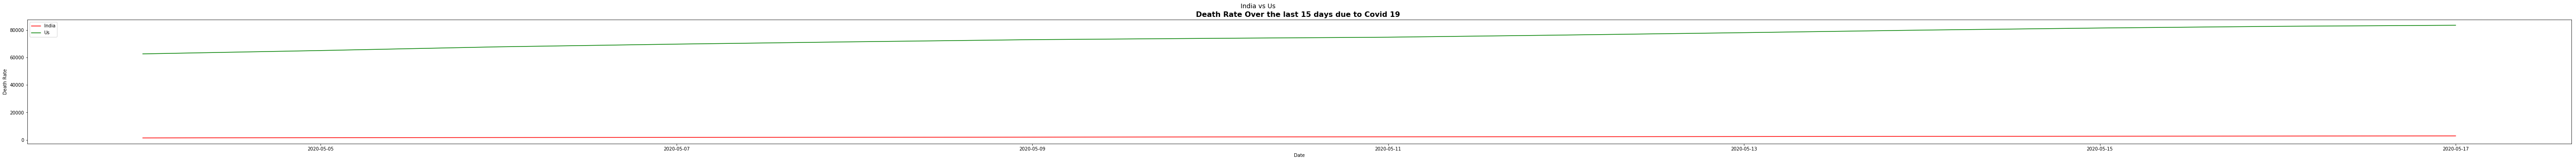

In [145]:
plt.plot(merged['Date'],merged['India_deaths'],'r', label="India")
plt.plot(merged['Date'],merged['Us_deaths'],'g' ,label="Us")
# Add legend
plt.legend(loc='upper left')
# Add title and x, y labels
plt.title("Death Rate Over the last 15 days due to Covid 19 ", fontsize=16, fontweight='bold')
plt.suptitle("India vs Us", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Death Rate")
plt.rcParams["figure.figsize"] = [10, 5]
plt.show()